In [89]:
#Importing all the necessary libraries
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [90]:
#Loading the Train and Test dat

Train_data=pd.read_excel('Flight_Train.xlsx')
Test_data=pd.read_excel('Flight_Test.xlsx')


In [91]:
#Seeing the first five row of Training data
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [92]:
#Seeing the first five row of Test data
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [93]:
#Checking the shape of train and test data

print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (10683, 11)


Test_data: (2671, 10)


Now from here we frist Analyze the Train data set and the same process is repeated for the Test data set.If we concate
train and test data then there is a problem of data leakage.So for that reason we do not combine our data set and analyze
the data set seprately.

# Train Data

In [94]:
#Checking the shape of Train data
Train_data.shape

(10683, 11)

In [95]:
#Checking the columns of train data
Train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [96]:
#Checking for any null values
Train_data.isnull().values.any()

True

In [97]:
#Checking the null value in columns
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

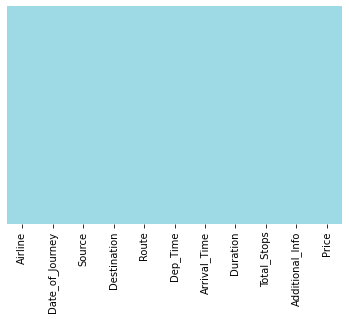

In [98]:
#Now agian check it via visualization
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

Observation:
    
    Only one value is null in Route column and Total_Stops column. So instead of filling them we can drop it.

In [99]:
#Dropping the null values
Train_data.dropna(inplace=True)

In [100]:
#Now again checking for null values
Train_data.isnull().values.any()

False

In [101]:
#checking the null values in columns
Train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Observation:
    
    Now there is no null value present in our dataset.

In [102]:
#Now Checking the shape
Train_data.shape

(10682, 11)

In [103]:
#Checking the information about Train dataset
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


Observation:
    
    1-All the columns are object data type except Price column which is int data type and our independent variable.
    
    2-Before going further we have to change the data type of columns which have object data type and also we have to
    
    change the value inside these columns because our model does not understan these string values.

# Summary Statistics

In [104]:
Train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observation:
    
    1-The minimum price of flight is 1759 rupees and maximum is 79512 rupees.
    
    2-Mean is greater than median thats why Price column is right skewed.

# Exploratory Data Analysis

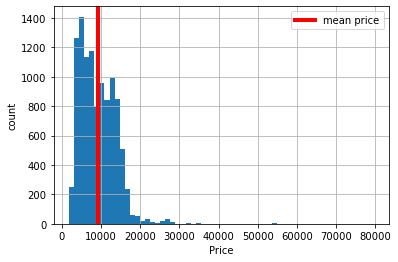

In [105]:
#Checking the mean Price.

price = Train_data['Price'].hist(bins=60)
mean_val = np.mean(Train_data['Price'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean price')
plt.xlabel('Price')
plt.ylabel('count')
plt.legend()
plt.show()

From description we can see that Date_of_Journey is a object data type, therefore we have to convert this data type into timestamp so we use this column 
for proper prediction.

In [106]:
#Checking the unique value in journey data column.
Train_data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

Here from date of journey all the data are from year 2019 so we cannot create seprate column for year.

In [107]:
#Making the new column Journey date
Train_data['Journey_date']=pd.to_datetime(Train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [108]:
#Making the new column Journey month
Train_data['Journey_month']=pd.to_datetime(Train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [109]:
#Now after the making the new columns here we check the first five row of our train data.
Train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [110]:
#Now we are going to drop Date of_Journey because we have converted this column into integers and as it is of no use.

Train_data.drop(['Date_of_Journey'],axis = 1, inplace = True)

In [111]:
#Now we convert Departure time.
#Departure time is time when a plane leaves the source airport
#Simelary we can extract the values from Dep_time as we fetch the values from Date_of_Journey.

#Feching Hours
Train_data['Dep_hour']=pd.to_datetime(Train_data['Dep_Time']).dt.hour

#Feching Minutes
Train_data['Dep_min']=pd.to_datetime(Train_data['Dep_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use
Train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [112]:
Train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [113]:
#Now we convert Arrival_Time

#Feching Hours
Train_data['Arrival_hour']=pd.to_datetime(Train_data['Arrival_Time']).dt.hour

#Feching Minutes
Train_data['Arrival_min']=pd.to_datetime(Train_data['Arrival_Time']).dt.minute

#Now we can drop Dep_Time as it is of no use
Train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [114]:
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [115]:
#Now we convert Duration.
#Duration is the time taken by place to reach the destination..
#It is the difference between Departure Time and Arival Time.
#Assigning and converting Duration column into list
duration = list(Train_data["Duration"])
for i in range(len(duration)):
    #Check if duration contains only hour or mins    
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            # Adds 0 minute
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adds 0 hour
            duration[i] = "0h " + duration[i] 
            
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    #Extract hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    #Adding duration_hours and duration_mins list to train_data
    #dataframe
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()
                                                             [-1])) 

In [116]:
#Adding duration hours and duration minute list to train_data
Train_data['Duration_hours'] = duration_hours
Train_data['Duration_mins']=duration_mins

In [117]:
#Now checking our train data
Train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [118]:
#Dropping Duration column as it has no use
Train_data.drop(['Duration'],axis = 1,inplace=True)

In [119]:
Train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


**Airline vs Price**

In [120]:
print(Train_data['Airline'].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


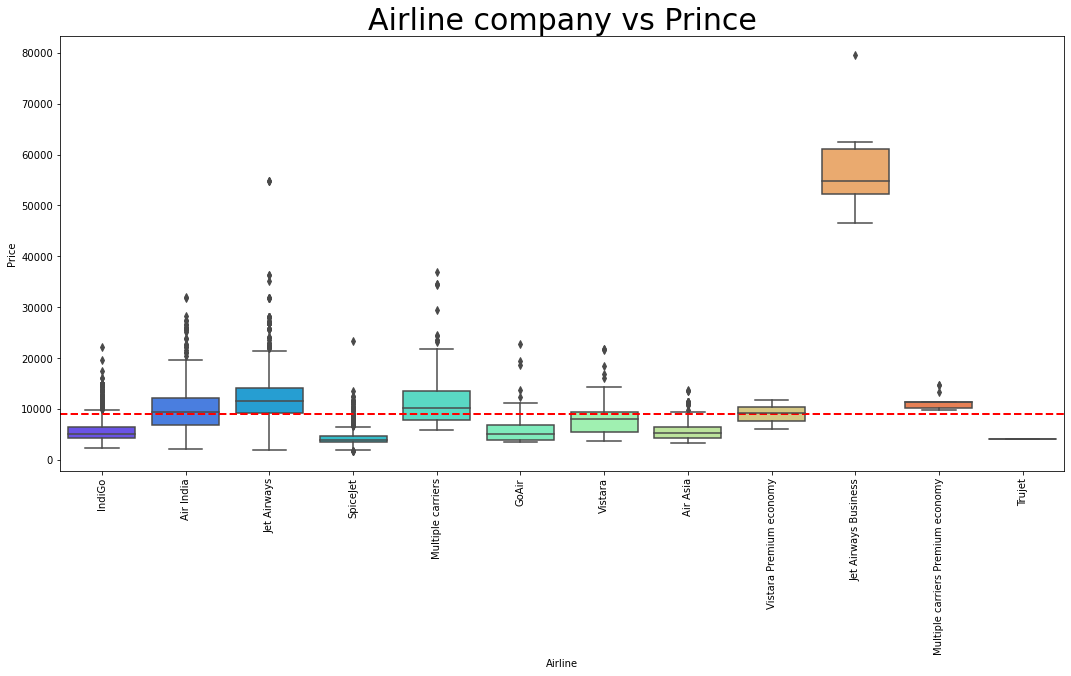

In [121]:
#Airline vs Price
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Airline',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title('Airline company vs Prince',fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

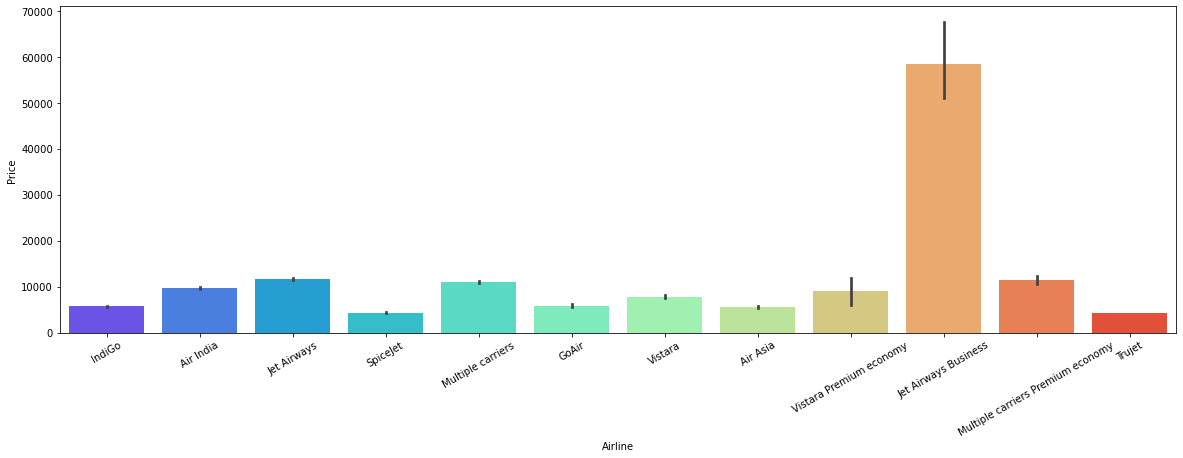

In [122]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

Observation:
    
    From above graph we can see that Jet Airway Business have the highest price. We can also remove it as Jet Airways is closed.
    
    There are also some outliers present in Airways price which needs to be removed.

**Source vs Price**

In [123]:
print(Train_data['Source'].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


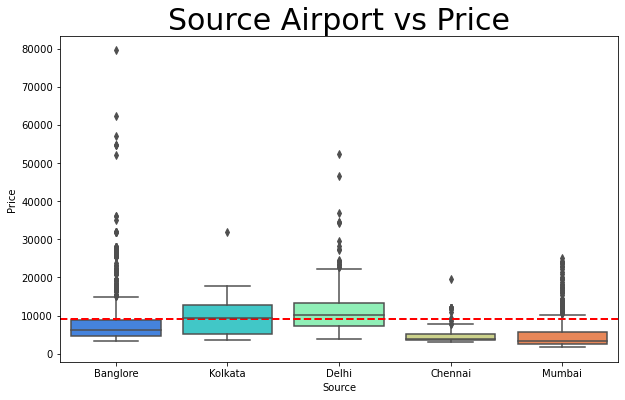

In [124]:
#Airline vs Price
plt.figure(figsize=(10,6))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Source',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title('Source Airport vs Price',fontsize=30)
plt.xticks(rotation='0')
plt.show()

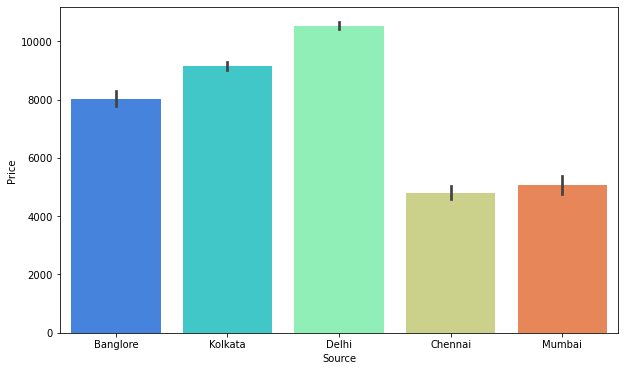

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

Observation:
    
    From Delhi price of Flight is very high.
    
    But from Banglore some tickets price is too high which may be outliers.

**Destination vs Price**

In [126]:
print(Train_data['Destination'].value_counts())

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


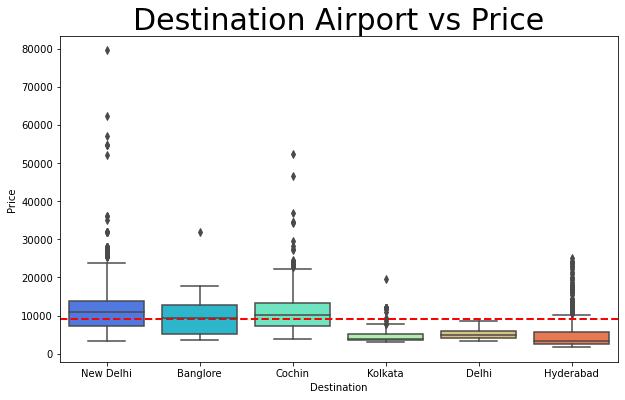

In [127]:
#Airline vs price
plt.figure(figsize=(10,6))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Destination',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title('Destination Airport vs Price',fontsize=30)
plt.xticks(rotation='0')
plt.show()

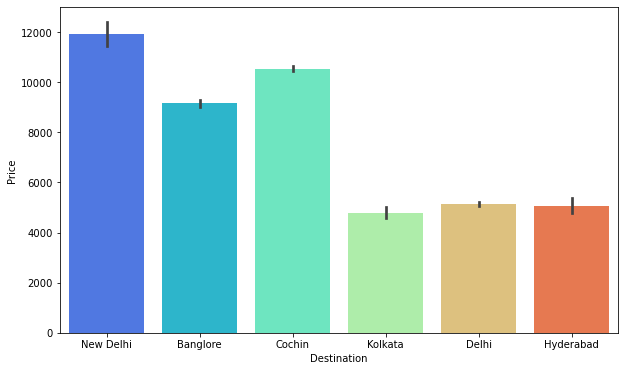

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(x='Destination',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

Observation:
    
    The maximum fare is for New Delhi.

**Total stop vs Price**

In [129]:
Train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

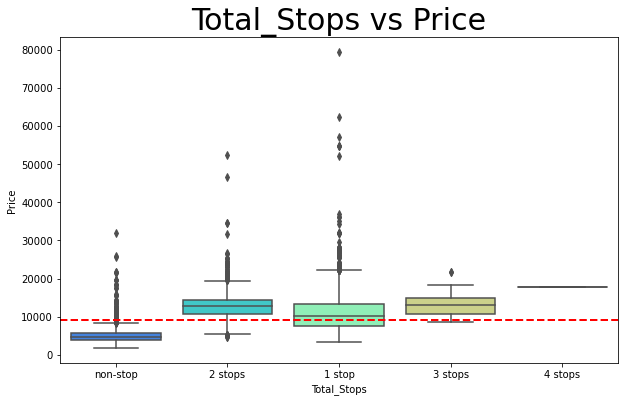

In [130]:
plt.figure(figsize=(10,6))
mean_price=np.mean(Train_data['Price'])
sns.boxplot(y='Price',x='Total_Stops',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title('Total_Stops vs Price',fontsize=30)
plt.xticks(rotation='0')
plt.show()

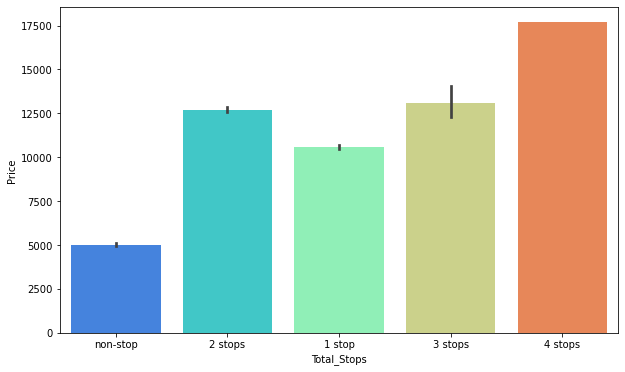

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Stops',y='Price',data=Train_data,palette='rainbow')
plt.xticks(rotation=0)
plt.show()

Observation:
    
    It is clearly seen that stops does not affect the price of the flight.
    
    Flights which have four stops have higher price.

# Handling Categorical Data

**Using OneHotEncoding to convert the Airline,Source,Destination column because it is nominal Categorical data.**

In [132]:
#Converting Airline column

Airline=Train_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [133]:
#Converting Source column

Source = Train_data['Source']
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [134]:
Destination = Train_data['Destination']
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [135]:
#We can drop some of the columns
Train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [136]:
Train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [137]:
Train_data['Total_Stops'].dtypes

dtype('O')

In [138]:
#Now we have to convert Total_Stop
Train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, 
                    "3 stops": 3, "4 stops": 4}, inplace = True)
Train_data.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [139]:
#Train_data["Total_Stops"] = Train_data["Total_Stops"].astype(str).astype(int)
#print(Train_data.dtypes)

In [140]:
#Adding out Airline,Soure,Destination column into Train data set
train=pd.concat([Train_data,Airline,Source,Destination],axis=1)

In [141]:
train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [142]:
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [143]:
train.shape

(10682, 30)

**Now All the columns change into Numeric data type now same steps are follow in test data.**

# test data

In [144]:
Test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [145]:
# Preprocessing
print('Test_data Info')
print("*"*85)
print(Test_data.info())

print('\n')

print('Null Values:')
print("*"*85)
Test_data.dropna(inplace=True)
print(Test_data.isnull().values.any())
print('\n')
print(Test_data.isnull().sum())

print('\n')

#EDA

#Data_of_Journey
Test_data['Journey_date']=pd.to_datetime(Test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
Test_data['Journey_month']=pd.to_datetime(Test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
Test_data.drop(['Date_of_Journey'],axis = 1,inplace=True)


#Dep_Time
Test_data['Dep_hour']=pd.to_datetime(Test_data['Dep_Time']).dt.hour
Test_data['Dep_min']=pd.to_datetime(Test_data['Dep_Time']).dt.minute
Test_data.drop(['Dep_Time'],axis=1,inplace=True)

#Arrival_Time
Test_data['Arrival_hour']=pd.to_datetime(Test_data['Arrival_Time']).dt.hour
Test_data['Arrival_,min']=pd.to_datetime(Test_data['Arrival_Time']).dt.minute
Test_data.drop(['Arrival_Time'],axis = 1,inplace=True)

duration = list(Test_data["Duration"])
for i in range(len(duration)):
    #Check if duration contains only hour or mins    
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            # Adds 0 minute
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adds 0 hour
            duration[i] = "0h " + duration[i] 
            
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    #Extract hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    #Adding duration_hours and duration_mins list to train_data
    #dataframe
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()
                                                             [-1])) 
            
#Adding duration hours and duration minute list to Test_data
Test_data['Duration_hours'] = duration_hours
Test_data['Duration_mins']=duration_mins
Test_data.drop(["Duration"],axis=1,inplace=True)


#Categorical data
print('Airline')
print("*"*85)
print(Test_data["Airline"].value_counts())
Airline = pd.get_dummies(Test_data["Airline"],drop_first=True)

print()

print("Source")
print("*"*85)
print(Test_data["Source"].value_counts())
Source = pd.get_dummies(Test_data["Source"],drop_first=True)

print()

print("Destination")
print("*"*85)
print(Test_data["Destination"].value_counts())
Destination=pd.get_dummies(Test_data["Destination"],drop_first=True)

#we can drop some of the columns
Test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)


#Now we have to convert Total_Stop
print("Total_Stops")
print('*'*85)
print(Test_data['Total_Stops'].value_counts())
Test_data.replace({'non-stop':0,'1 stop':1,'2 stop':2,'3 stop':3,'4 stop':4},inplace=True)

#Adding out Airline, Source,Destination column into Test data set
test=pd.concat([Test_data,Airline,Source,Destination],axis=1)

#Now Dropping some columns that is Airline,Soure,Destination
test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test.head()

Test_data Info
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values:
*************************************************************************************
False


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route      

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,"Arrival_,min",Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
test.shape

(2671, 28)

**Now All the columns change into Numeric data type.**

# Summary Statistics

In [147]:
train.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [148]:
Train_data.describe()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


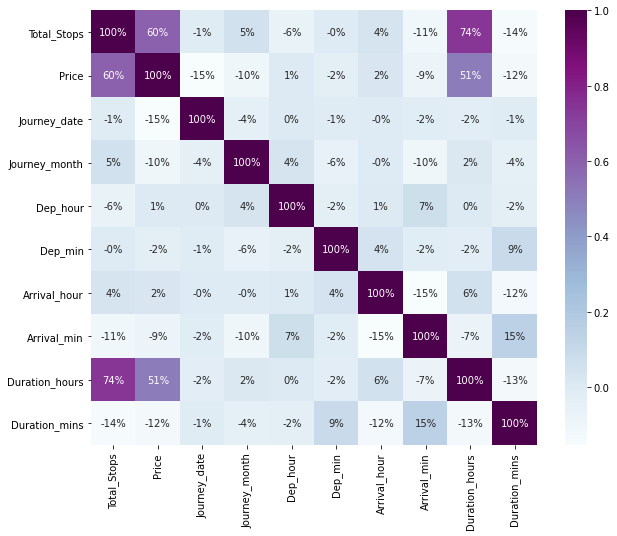

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

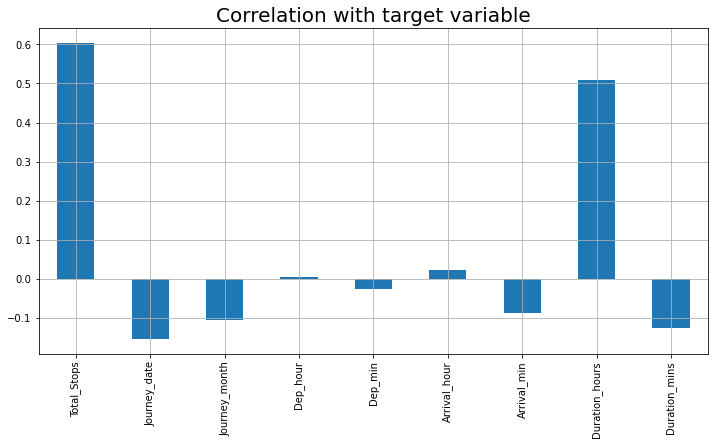

In [150]:
#Correlation with target column
plt.figure(figsize=(12,6))
Train_data.drop('Price',axis=1).corrwith(Train_data['Price']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('Correlation with target variable',fontsize=20)

# Removing Outliers

In [151]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[1.22066609, 1.12553455, 1.23728754, ..., 0.2642058 , 0.19231927,
        3.23440464],
       [1.74143186, 0.30906781, 1.47530729, ..., 0.2642058 , 0.19231927,
        0.30917591],
       [1.74143186, 1.03978296, 0.53179604, ..., 0.2642058 , 0.19231927,
        0.30917591],
       ...,
       [1.22066609, 0.40296691, 1.59110426, ..., 0.2642058 , 0.19231927,
        0.30917591],
       [1.22066609, 0.77218138, 1.47530729, ..., 0.2642058 , 0.19231927,
        3.23440464],
       [1.74143186, 0.57809433, 0.53179604, ..., 0.2642058 , 0.19231927,
        0.30917591]])

In [152]:
threshold=3
print(np.where(z>3))

(array([    0,     4,     5, ..., 10676, 10680, 10680], dtype=int64), array([29, 29, 17, ..., 17, 19, 29], dtype=int64))


In [153]:
train_new=train[(z<3).all(axis=1)]

In [154]:
#Checking the shape
print(train.shape,'\t\t',train_new.shape)

(10682, 30) 		 (7506, 30)


In [155]:
train=train_new
train.shape

(7506, 30)

# Feature Seleaction

In [156]:
train.shape

(7506, 30)

In [157]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [158]:
#splitting the data input output variable.
x=train.drop(columns=['Price'],axis=1)
x.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
9,1,27,5,11,25,19,15,7,50,0,...,0,0,1,0,0,1,0,0,0,0
10,1,1,6,9,45,23,0,13,15,1,...,0,0,1,0,0,1,0,0,0,0


In [159]:
y=train['Price']
y.head()

1      7662
2     13882
3      6218
9      8625
10     8907
Name: Price, dtype: int64

In [160]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(7506, 29) 		 (7506,)


In [161]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [162]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [163]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(6004, 29) 		 (1502, 29)


In [164]:
#checking the shape
print(y_train.shape,'\t',y_test.shape)

(6004,) 	 (1502,)


In [165]:
#Importing all the model library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [166]:
# All Algorithm by using for loop
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),Ridge(),ElasticNet(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('**********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.5858487723872358
MAE: 1926.088479987418
MSE 6025234.734017904
RMSE: 2454.6353566299626
R2_score: 0.5666963485199273
**********************************************************************************************


Score of DecisionTreeRegressor() is: 0.9401370943283063
MAE: 1417.4638592987128
MSE 5092865.902871911
RMSE: 2256.7378897142466
R2_score: 0.6337474821099311
**********************************************************************************************


Score of KNeighborsRegressor() is: 0.8281911847682256
MAE: 1416.228362183755
MSE 3840906.90804261
RMSE: 1959.8231828516086
R2_score: 0.7237818837408048
**********************************************************************************************


Score of Lasso() is: 0.5858489305877688
MAE: 1925.0099213241604
MSE 6020701.619753121
RMSE: 2453.7118045428892
R2_score: 0.567022346601366
**********************************************************************************************


Score of Ridge(

In [167]:
# Cross validate All Algorithm by using for loop
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),Ridge(),ElasticNet(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation',score.std())
    print('***************************************************************************************')
    print('\n')

Model LinearRegression()
Score: [0.573591   0.57041301 0.57067078 0.5714036  0.59255432 0.58727963
 0.56148702 0.58424849 0.59469388 0.5893648 ]
Mean Score: 0.5795706531488978
Standard deviation 0.01080309363805202
***************************************************************************************


Model DecisionTreeRegressor()
Score: [0.6110021  0.63209099 0.60229206 0.64325184 0.60247457 0.65954125
 0.58725295 0.60573364 0.54994695 0.55159286]
Mean Score: 0.6045179225795306
Standard deviation 0.033790444994421256
***************************************************************************************


Model KNeighborsRegressor()
Score: [0.73818768 0.77412695 0.72205311 0.75630263 0.72708759 0.75459845
 0.75057718 0.73215305 0.7369855  0.71251118]
Mean Score: 0.740458329949002
Standard deviation 0.017526317996538827
***************************************************************************************


Model Lasso()
Score: [0.57347764 0.57067648 0.57039856 0.57247539 0.59298356

**Random Forest Regressor gining best score and r2 score so I choose it as my final model.**

Using GridSearchCV to find the best parameters

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 400}


In [170]:
#Using Random Forest Regressor wiht its best parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('r2_score:',r2_score(y_test,y_pred))

Score: 0.8760386651929284


Mean absolute error: 1195.5207605810351
Mean squared error: 2673183.39090268
Root Mean Squared Error: 1634.9872754558917


r2_score: 0.8077585064338887


**Now Our R2 score is increases**

**Before Hyperparameter tunning -----r2_score is: 0.74**

**After Hyperpatameter tunning-----r2_score is:0.87**

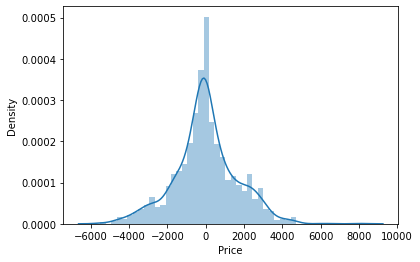

In [171]:
#ploting the distribution plot and we find the Gauusion plot
sns.distplot(y_test-y_pred)
plt.show()

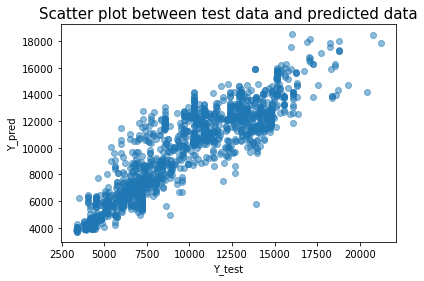

In [172]:
#scatter plot between test data and prediction
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('Scatter plot between test data and predicted data',fontsize=15)
plt.show()

In [173]:
#saving the model
#Importing joblib
import joblib
#save the model as a pickle in afile
joblib.dump(rf,'Flight_Fare_prediction_rf.pkl')

['Flight_Fare_prediction_rf.pkl']